In [ ]:
# Julia set

In [57]:
import numpy as np, matplotlib.pyplot as plt

# Initial values
xrange = [-5, 5]
yrange = [-5, 5]
n = 128      
#points = np.zeros((n, n))
zmax = 1000
itmax = 100
c = complex(0, 0)

def absCom(z):
    return np.sqrt((z.real**2) + (z.imag**2))

def isInSet(z, c):
    belowMax = True
    it = 0
    
    while belowMax and it < itmax:
        z = (z**2)+c
        belowMax = absCom(z) < zmax
        it += 1

    return it
    
    #if absCom(z) > zmax:
    #    return False
    #elif it > itmax:
    #    return True
    #else:
        #return isInSet((z**2)+c, c, i+1)

In [58]:
xpoints = np.zeros(n**2)
ypoints = np.zeros(n**2) 

# Create lines along x and y axes
# These are the dimensions of the rectangular region to examine
dx = np.linspace(xrange[0], xrange[1], n)
dy = np.linspace(yrange[0], yrange[1], n)

# Create evenly spaced points across surface of rectangular region to test
for i in range (0, n):
    for j in range (0, n):
        #points[i*n][j] = complex(xrange[0] + i*dx[i], yrange[0] + j*dy[j])
        xpoints[n*i + j] = dx[i]
        ypoints[n*i + j] = dy[j]

In [59]:
julia = np.zeros(n**2)

for i in range(0, n**2):
    z = complex(xpoints[i], ypoints[i])
    julia[i] = isInSet(z, c)

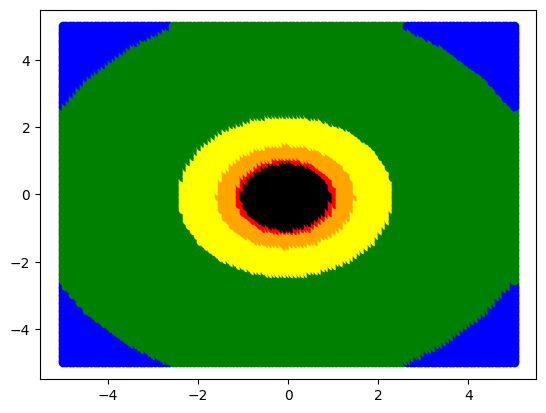

In [56]:
for i in range (0, n**2):
    if julia[i] == 100:
        plt.plot(xpoints[i], ypoints[i], marker='o', c='black')
    elif julia[i] > 6:
        plt.plot(xpoints[i], ypoints[i], marker='o', c='red')
    elif julia[i] <= 6 and julia[i] > 4:
        plt.plot(xpoints[i], ypoints[i], marker='o', c='orange')
    elif julia[i] == 4:
        plt.plot(xpoints[i], ypoints[i], marker='o', c='yellow')
    elif julia[i] == 3:
        plt.plot(xpoints[i], ypoints[i], marker='o', c='green')
    elif julia[i] == 2:
        plt.plot(xpoints[i], ypoints[i], marker='o', c='blue')
    elif julia[i] == 1:
        plt.plot(xpoints[i], ypoints[i], marker='o', c='black')

plt.show()